## ABSENTEEISM DURING WORK HOURS

The exercise will address **Absenteeism** at company during work hour. The problem is that the business environment of today is more competitive than it used to be. This leads to increased pressure in the workplace.
Therefore it is reasonable to expect that unachievable business goals and an elevated risk of unemployment can raise people's stress levels. Often the continuous presence of such factors becomes detrimental to a person's health. Sometimes this may result in minor illness which of course is not desired.However it may happen that the employee develops a long term condition. An example being depression.

We'll look at predicting absenteeism from work.More precisely we would like to know whether or not an employee can be expected to be missing for a specific number of hours in a given workday. Having such information in advance can improve our decision making. How by reorganizing the work process in a way that will allow us to avoid a lack of productivity and increase the quality of work generated in our firm.So here's how we'll define absenteeism the absence from work during normal working hours resulting in temporary incapacity to execute regular working activity okay logically. Here come some additional questions based on what information should we predict whether an employee is expected to be absent or not. 

How would we measure absenteeism. Should we rather think about trying to predict excessive absenteeism.
We will answer these and other questions as we proceed with our analysis. For the moment just remember that as a whole the purpose of the business exercise will be to explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not. In other words we want to know for how many working hours an employee could be away from work based on information such as how far they live from their workplace. How many children and pets they have. Do they have higher education and so on.

So the data said we'll be working on is based on the data set of an already existing study about the prediction of absenteeism at work. This means that the business exercise you will go through will be realistic. We will start working on the ‘Absenteeism_data.csv’ file and take it to a usable state in a machine learning algorithm.

#### Data Preprocessing:

Let's see how we can import a data table into python and work on it afterwards first and foremost. `We will have to import the pandas module.` It is the python library that allows us to work with panel data sticking to the recommended convention. We will give this module the name pd so that every time we need this module while coding we will just type pd for short instead of writing pandas more technically speaking. We want to use precisely this library because it possesses various tools for handling data in a tabular format. The latter being called a pandas data frame so very intuitively let's call the variable that will contain
our data.Loaded into python and it is in a tabular format as we expected.


In [1]:
#import the pandas module
import pandas as pd
#load the data
abb = pd.read_csv('data/Absenteeism-data.csv')
abb.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


We have columns with data I.D.. Reason for absence date etc. Until absenteeism time in hours everything looks OK.So what needs to be done in terms of pre processing remember it is essential to always eyeball your data first. This means you must carefully examine it from left to right and top to bottom.
        
At the beginning of your code you must always make a copy of your initial dataset.Why is that necessary. Because otherwise you start manipulating the data frame. The changes you make will be applied to your original dataset for example renaming a column from raw data will not give you the chance to restore the previous column name. If you have forgotten it hints using a copy is playing on the safe side making sure the initial data frame won't be modified and you'll be able to refer to it at a later stage of the analysis if needed This was the logic from a programming point of view and now we'll show you how to do this in Python



In [2]:
df = abb.copy()
#Let's check the content of the variable df
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [3]:
#You could apply the pandas Max columns and rows display options.
#set  no max value when shoing the data
pd.options.display.max_columns =None
pd.options.display.max_rows =None

In [4]:
#Okay so by running these two lines of code we have set the preferred display options to see the data frame.
#display(df)

And if your data set is much larger than the one we have here and you still need to check for missing values what you can do is print a concise summary of the data frame. This can be done by applying the info method directly to df. So when we execute this cell we will receive an output telling us the number of columns in our data as well as their names and respective data types.

**Moreover you see all columns contain precisely 700 values each which is real proof.There are no missing values in our table.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
ID                           700 non-null int64
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 65.7+ KB


The  output telling us the number of columns in our data as well as their names and respective data types. Moreover you see all columns contain precisely 700 values each which is real proof. There are no missing values in our table.

### ARTICLE - A Brief Overview of Regression Analysis

A popular tool in data analytics, machine learning, advanced statistics, and econometrics, is regression analysis.

Roughly speaking, this is an equation which on one side has a variable, called a dependent variable, because its value will depend on the values of all variables you see on the other side. The variables on the right side are all independent, or explanatory. Their role is to explain the value of the dependent variable. There are more terms that can be used for these variables in the same context. The dependent variable can also be called a target, while the independent variables can be called predictors. To avoid confusion with the term ‘variable’, which has a different meaning when used by programmers, we, as BI analysts or data scientists, will call the explanatory variables ‘features’, you could call them ‘attributes’ or ‘inputs’ as well.

 
`Logistic regression`:It is a type of a regression model whose dependent variable is binary. That is, the latter can assume one of two values – 0 or 1, True or False, Yes or No. Therefore, considering the values of all our features, we want to be able to predict whether the dependent variable will take the value of 0 or 1. Apart from logistic regression, there are many other types of equations that allow you to calculate the dependent variable in a different way. Logistic regression is just one of them – and it is one that has been used massively.

Anyway, you would most often hear professionals say that they are trying to find a regression model, or, simply, find a regression, that has a high predictive power. In other words, what they are trying to do is settle upon an equation that could be used to estimate expected values for the dependent variable with great precision. For the moment, this introduction to regression analysis and logistic regression gives us the necessary grounds to proceed with the pre-processing part of our task.

**What do we want to predict, absenteeism from work.** The last column expresses absenteeism time in hours.
That data tell us whether an employee has been absent for a significant amount of time on a certain date has been stored in the absenteeism time and hours column. So transferring a piece of logic from regression analysis to our example we could say that absenteeism time and hours will be our `dependent variable`. And what could help us predict this value for `future observations`. All other columns represent `independent variables` which could potentially be used in our equation with the hope that they will help us predict whether an individual with particular characteristics is expected to be absent from work for a certain amount of time or not.

**What does an employee I.D. tell us.** Obviously that's the individual identification of each person. This means that each number from this column represents a specific employee. Therefore the identification number is the only information we have that indicates precisely who has been away during working hours. And this information is useful to have. It could help company management when monitoring the presence of each employee. However will this information improve our analysis in any way. Actually no it will rather do the opposite. How would a value of 5 or 10 make a difference to the absenteeism time the I.D. is just a label variable a number that is there to distinguish the individuals from one another not to carry any numeric information. It is nominal data. Thus I.D. can't help explaining the value of the absenteeism time. So in such a situation as researchers or analysts what we should do is drop this variable.


The drop method has to be applied to the data frame. In the parantehesis we should indicating the names of all columns. We'd like to get rid of for the moment.In this case, this is just the `I.D. column`. There's another really important thing to add here is Axis equals 1 (`axis=1`) for removing a column from our data frame. Because unless we specify the axis python will assume we are talking about the rows of our data frame and in our case we don't have a row that's called I.D.. The other thing, we should assign the expression containing the drop method to the df variable itself by typing df equals and then state the relevant expression. Executing this line of code will overwrite the content of the data frame.(Otherwise ,the variable permanently remove from column)

In [6]:
df = df.drop(['ID'], axis = 1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


**Let's examine the Reason for absence**. We'll need extract this column only from our data set. The best way to do this is by typing the data frame name and then within brackets indicating the name of the column you would like to examine in more detail in our case.

In [7]:
df['Reason for Absence'].head()

0    26
1     0
2    23
3     7
4    23
Name: Reason for Absence, dtype: int64

On the left we have indexes designating the order in which the elements appearstarting from zero. And then we got the exact values we needed. We want to extract a list containing distinct values only in other words we want to see all the different values organized in a list in only shown once to do this you can call or invoke the `unique` method from pandas. 

Python `sorted` function returns a new sorted list from the items in its argument.That's why sorted open parentheses the expression delivering the list with unique values close parentheses

In [8]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [9]:
sorted(df['Reason for Absence'].unique())
# you will seee that number 20 is missing.

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

Remember numbers without an inherent meaning are just `numbers`. You must always look for ways to get insight from these numbers. How can we extract some meaning from these numeric values. The reason for absence column contains integers only when you hear reason number one. Are you able to immediately figure out why a person was absent during a certain working day. And are you able when you hear reason 22 No you aren't. So you should immediately ask yourself which are the 28 reasons we have substituted with numbers here. Similarly to the case of the ID column the values here do not actually have a numeric meaning they represent categories that are equally meaningful. In other words reason 1 stands for a certain reason for absence as much as reason 2 stands for another
the fact that in arithmetic terms 2 is greater than 1 has nothing to do with the numbers in this column. So,we can  turn these values into dummy variables in econometrics statistics and data analytics in general or more particularly in regression analysis. A dummy variable is an explanatory binary variable that equals one if a certain categorical effect is present and that equals zero.If that same effect is absent therefore we went to have a column where the values of one will appear in case an individual has been absent because of reason number 1 and 0. Then we'd like to apply this logic for all 28 different values in this column intuitively the panda's method that will allow us to do this with one command is called `Get dummies`.

It must be implemented to the reason for absence column from The df data frame for convenience.Let's store the output in a variable we'll call `reason columns` when run this cell and what we get is a separate data set with 28 columns bearing the numbers from 0 to 28 as their names.

In [10]:
reason_columns =pd.get_dummies(df['Reason for Absence'])
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


We will drop the reason zero dummy variable in Python. We are going to do this because we want to avoid potential multicore linearity issues in our analysis.

In [11]:
reason_columns =pd.get_dummies(df['Reason for Absence'], drop_first=True)
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


We still have the reason for absence column in df.If we decide to add all those dummy variables to the current state of df we would observe duplicate information that is the categorical variable reason for absence on one side would convey the same information as all 27 columns from reason columns on the other in econometrics statistics and data analytics this phenomenon is called `multicore linearity` and it is something that should be avoided in general. Therefore in our case we could drop the reason for absence column from the df data frame

In [12]:
df  = df.drop(['Reason for Absence'], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


If we add all these dummy variables in the df data frame we would end up with a dataset containing nearly 40 columns. This sounds like too much. When dealing with 700 observations and a situation where you have so many variables of the same type and here this regards the dummies you should always consider the possibility of grouping these variables by the way. Remember that a group can be also called a class. Consequently the relevant process of reorganizing a certain type of variables into groups in a regression analysis can be called classification. Then there are various techniques that can help you decide on how to group the variables from your dataset for our exercise. We will focus on a qualitative analysis because it seems most appropriate look at this table with explanations of all possible reasons for absence. You'll see that reasons 1 2 14 are all related to various diseases. This could constitute our first group or class the second class instead could include reasons from 15 to 17 as they are all somehow related to pregnancy and giving birth group 3 would include reasons 18 19 20 and 21 as they are all about poisoning or signs not elsewhere categorized the fourth group represents so-called light reasons for absence such as a dental appointment physiotherapy a medical consultation and others OK this is how we are going to classify these columns.

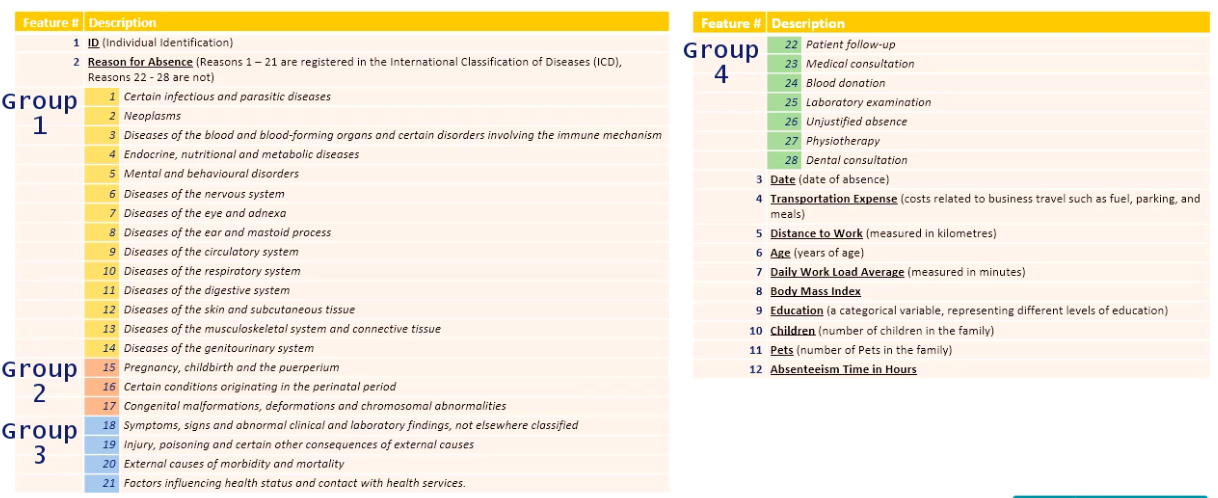

Therefore the next thing to do will be to apply this in Python where we will have to create a new data frame for each group. We'll do this by separating the reason columns data frame. Remember that after splitting this object into smaller pieces each piece itself will be a data frame object as well so let's call these new groups. Reason type class no then we must start by applying the `loc method` to reason columns. We want to substitute an entire row of 14 values with a new single one column for group 1. there's a method in Python called Max that can do a perfect job here.Let's apply it to the first 14 columns of the variable reason columns.Obviously we must write dot max and then by typing access equals 1 within parentheses we will indicatethat we are interested in implementing this operation along the horizontal line.And Create the other group using same method.

In [13]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_1.head()

0    0
1    0
2    0
3    1
4    0
dtype: uint8

In [14]:
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)   ## from 22 to end of data frame

**Concatenate the data frame** We should combine the two objects. To concatenate the df and the newly created reason type columns  we are using the pandas's `concatenation function`.

In [15]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis =1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


Leaving the columns named as 0 1 2 and 3 would be strange. There are a few ways to do this and here's the one we prefer dot columns dot values. Will retrieve a list with a column names for you what we want to do is create a new list and assign its elements as the column names of df.

In [16]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [17]:
column_name = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours','Reason_1','Reason_2','Reason_3', 'Reason_4']

In [18]:
df.columns =column_name
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


**Reorder the columns in your data frame.** That's a very important tool to have under your belt. If a colleague of yours asks you to do this to solve this mini problem we will follow the same professionalapproach used so far and we'll create another list with column names this time calling it column_names_reordered.We will take the information from the previous list with column names.This time though we will cut the last four titles and we'll paste them at the beginning we do this because we want to see the reasons for absence at the beginning of the table..The new order to our data frame. df equals df and then in brackets state the name of the list containing the new column names execute and check the head of the new version of the data frame

In [19]:
column_name_reordered = ['Reason_1','Reason_2','Reason_3', 'Reason_4',
                         'Date', 'Transportation Expense', 'Distance to Work', 'Age',
                         'Daily Work Load Average', 'Body Mass Index', 'Education',
                         'Children', 'Pets', 'Absenteeism Time in Hours']

In [20]:
df = df[column_name_reordered]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


**Creating checkpoints** while programming in Python and especially Jupiter is crucial.
Think of a checkpoint as an interim Save of your work creating one is like taking a picture of a story at a given point in time. We do that to have more control over our data. The code we've been working on here is a very good example of why we need checkpoints for instance. So far we've dropped our I.D. column and have elaborated on the reason for absence column successfully. However imagine that we have to test a number of ways in which we'd like to modify the remaining columns of our data set. Often this will lead to changes in the content of our data frame in such a situation. Every time we'd like to take a step back and proceed from this point on we'll have to go all the way up to the moment of creation of the D F data frame rerun the entire piece of code we've written so far and only then would we be able to continue testing different techniques on the remaining columns. What we will do instead is create a copy of the current state of the df data frame and use it for the name that clearly tells us what step of the data pre processing. We will call this procedure creating a checkpoint therefore setting up a variable called df_reason_mod.  Keep in mind that the checkpoint we created df reason mod was related to the current state of RDF data frame. In programming in general and in Jupiter in particular creating checkpoints refers to storing the current version of your code.

In [21]:
#Creating the copy of df with modifiyed version included reason for absence column.
df_reason_mod = df.copy()
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


We'll concentrate on the `date column` of our data frame. Let's check its content by executing the date in brackets each of its values shows a date in the following way. Day Of The Month month year at the same time. Forward slashes are not used for writing integers or floats for example. So does this column contain strings or values of another kind.Let's use the type of function to find the answer type. df date column indicates the entire column is a python series object and that's fine. Every column in a data frame is in the form of a series but this doesn't tell us much about the data type of each of its values. And don't forget in one column or in one series we can have values of a single data type only so let's check the type of the first value of this series by running the same cell. After adding a zero within brackets just before closing the parentheses,`str` stands for string.

In [22]:
df['Date'].head()

0    07/07/2015
1    14/07/2015
2    15/07/2015
3    16/07/2015
4    23/07/2015
Name: Date, dtype: object

In [23]:
type(df['Date'])

pandas.core.series.Series

In [24]:
type(df['Date'][0])

str

We have just received a dataset where the data values have been stored as text what we will do now is introduce a data type called timestamp. This is a classical data type found in many programming languages out there used for values representing dates and time to convert all values from the date column into timestamp values.We will convert the strings from the date column into timestamps with the help of the `format` parameter for convenience.
So to the format parameter we will need to assign a string value designating the structure of the current dates.
It is important to remember that this parameter allows you to take control over how python will read the current dates so that it can accurately understand which numbers refer to days months years hours minutes or seconds therefore the stream will not designate the format of the timestamps. You are about to create.

In [25]:
df['Date'] =pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'].head()

0   2015-07-07
1   2015-07-14
2   2015-07-15
3   2015-07-16
4   2015-07-23
Name: Date, dtype: datetime64[ns]

In [26]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

We will create the `month valu`e column from the Date column. We must find a way to deduct the month value contained in each date. We have an df. We will now show you how this can be done with pandas let's examine the first value of the date column.

In [27]:
df['Date'][0]

Timestamp('2015-07-07 00:00:00')

It is a timestamp 7th of July 2015. Moreover the time is set to midnight. We don't see a different time because a time stamp value created with the pandas to date time method always contains two parts a date and a time. If we didn't have time recorded in our dataset Python would have assigned zeros to the time component automatically.
So please don't be surprised when you see these numbers next to the date now to extract the month value only. We need to type `.month` at the end of the same expression run this cell and here you go.

In [28]:
df['Date'][0].month

7

We got seven representing the seventh month of the year July awesome please remember that the monthstake values from one to twelve not from zero to eleven.We would like to create a list that we will fill with the month values
of the dates and then we will assign the values of this list to a new column and df naming it month value.
Let's begin first to an object we'll call `list_months` we will assign an empty list Second we will use a loop that will iteratively extract the month value of every date we have in the date column.

In [29]:
list_months =[]
for i in range(df.shape[0]):   #df.shape[0] takes the row from the df dataframe
    list_months.append(df['Date'][i].month) 

Let's create a new column in our table by typing df and month value in brackets and then assign the numbers from our newly created list by writing equals.

In [30]:
df['Month Value'] =list_months
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


**Let's proceed by creating the day of the week column**. We wouldn't expect to see words in the new column.
Instead of having the days of the week. Monday Tuesday Wednesday and so forth.We'll have the values from `zero to six`.We will create a function that can execute this operation for one element and then implement it to all values from the column of interest.

In [31]:
df['Date'][5].weekday() 

4

In [32]:
#then we create the function to implement it to all values from the column of interest.
def date_to_week(data_value):
    return data_value.weekday()

In [33]:
#Create the weekday column 
df['Day of the Week'] = df['Date'].apply(date_to_week)
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [34]:
#Let's reorganize the date and copy data frame again
#drop the data column
df = df.drop('Date', axis =1)
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,3


In [35]:
#Move the Mount of value and day of the Week column after the Reaseons column
df.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the Week'], dtype=object)

In [36]:
column_name_day =['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
                  'Month Value','Day of the Week','Transportation Expense', 
                  'Distance to Work', 'Age',
                  'Daily Work Load Average', 'Body Mass Index', 'Education',
                  'Children', 'Pets', 'Absenteeism Time in Hours']

In [37]:
df = df[column_name_day]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


In [38]:
#Create a check point here
df_reason_date_mod = df.copy()
df_reason_date_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


We will focus on the next five columns which are Transportation Expense, Distance to Work, Age,Daily Work Load ,Body Mass Index. No we won't manipulate these columns in any way. They will be left without a change. Nonetheless we believe they will be important for our analysis and so they are worth some preliminary discussion. `Transportation expense` is a subcategory of travel expenses travel expenses are costs related to business travel such as fuel parking mills and other charges an employee may claim for reimbursement.This means transportation is just one of those potential costs.In our table this column contains monthly transportation expenses of an individual measured in dollars checking the data type of the numbers contained within it. We see it as a num pies into 64 which means under transportation expense we have integer values only.`Distance to work` contains rounded numbers only each value you see in this column represents the kilometers an individual must travel from home to work. We want to keep this feature in our analysis because it might turn out that the distance or the time spent travelling will affect the decision of an employee to be absent during working hours.`Age` column, there's not much to be said about this variable of course.How old a person is could always have an impact on her or his behavior as is often done in research.`Daily work load average`is a float value and represents the average amount of time spent working per day shown in minutes.`Body mass index`is an indicator for an under normal overweight or even obese person. Logically people who weigh above the norm for their height often have an additional reason for being absent from work.

In [39]:
#Let's go check their type one by one
type(df['Transportation Expense'][0])


numpy.int64

In [40]:
type(df['Distance to Work'][0])

numpy.int64

In [41]:
type(df['Age'][0])

numpy.int64

In [42]:
type(df['Daily Work Load Average'][0])

numpy.float64

In [43]:
type(df['Body Mass Index'][0])

numpy.int64

**We'll modify the content of the education column.** Whereas education is a feature where the numbers do not have numeric meaning.Our task would be to transform education into a dummy variable the `map function` will help us do that. So what values are stored in the education column.

In [44]:
#We canapply Python's unique method.
df['Education'].unique()

array([1, 3, 2, 4])

In [45]:
#panda's value_counts method allows us to see that the eachvalue has been how may times countered.
df['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

Education column contains only the values 1 3 2 and 4. <br>
`1: higher degree` <br>
`2: graduate`<br>
`3: postgraduate`<br>
`4: master or a doctor`<br>

We can see that with value_counts() method, nearly 600 people of high school education only while just above one
hundred have a better degree than that. Therefore separating between graduate postgraduate and doctor degrees becomes less relevant for this study and it would make sense to combine these in a single category. Technically this should be done by overriding the content of the education column after typing dot map and opening parentheses. We must insert a dictionary whose key value pairs will be composed of the existing numbers that will
act as keys and the new numbers which will stand for the values for instance up to this point. <br>
`1 -> 0  higher degree` <br>
`2 -> 1  graduate`<br>
`3 -> 1  postgraduate`<br>
`4 - >1  master ora doctor`<br>

In [46]:
df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})
df['Education'].unique()

array([0, 1])

In [47]:
#After map we can the values for each categori
df['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

Congratulations you've made it your way through the pre processing part of our exercise which was very exhaustive. While programming further on we must make a check point I'd like to call this version of the table df_preprocessed...

In [48]:
df_preprocessed = df.copy()
df_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [52]:
df_preprocessed.to_csv('data/absenteeism_preprocessed.csv', index=False)